In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
DATA_DIR = '/content/drive/MyDrive/Datathon Materials/'
df_owid = pd.read_csv(DATA_DIR + "1_owid/owid-covid-data.csv")

In [4]:
df_owid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58149,ZWE,Africa,Zimbabwe,2020-12-16,11749.0,227.0,106.000,313.0,3.0,1.286,790.490,15.273,7.132,21.059,0.202,0.087,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.0,191052.0,12.854,0.091,1319.0,0.089,0.080,12.4,tests performed,NaN,NaN,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58150,ZWE,Africa,Zimbabwe,2020-12-17,11866.0,117.0,112.143,314.0,1.0,1.286,798.362,7.872,7.545,21.126,0.067,0.087,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,193011.0,12.986,0.132,1356.0,0.091,0.083,12.1,tests performed,NaN,NaN,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58151,ZWE,Africa,Zimbabwe,2020-12-18,12047.0,181.0,126.429,316.0,2.0,1.429,810.540,12.178,8.506,21.261,0.135,0.096,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2155.0,195166.0,13.131,0.145,1457.0,0.098,0.087,11.5,tests performed,NaN,NaN,69.44,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58152,ZWE,Africa,Zimbabwe,2020-12-19,12151.0,104.0,133.143,318.0,2.0,1.571,817.537,6.997,8.958,21.396,0.135,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,196747.0,13.237,0.106,1488.0,0.100,0.089,11.2,tests performed,NaN,NaN,69.44,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [5]:
!pip install country_converter

import country_converter as coco
countries = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
standard_names = coco.convert(names=countries, to='iso3')
#print(standard_names)

diff = ['total_deaths_per_million', 'total_cases_per_million', 'total_tests_per_thousand', 'icu_patients_per_million', 'diabetes_prevalence', 'population', 'population_density', 'stringency_index', 'positive_rate', 'hospital_beds_per_thousand']

df = df_owid.fillna(method = 'ffill').fillna(method = 'bfill')

cols = list(df_owid.columns)
cols.append('cumulative_stringency')
full = pd.DataFrame(columns=cols)

dfs = []

for name, group in df.groupby("iso_code"):
    cm_index = []
    avg_index = []
    sum = 0
    count = 0
    for index, row in group.iterrows():
        cm_index.append(cm_index[-1] * 0.95 + 0.05 * row.stringency_index if len(cm_index) > 0 else row.stringency_index)
        sum += row.stringency_index
        count += 1
        avg_index.append(sum / count)
    
    group['cumulative_stringency'] = cm_index
    group['avg_stringency'] = avg_index
    # print (group[['stringency_index', 'cumulative_stringency']])
    dfs.append(group)

mega = pd.concat(dfs)

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.2-cp36-none-any.whl size=51547 sha256=f0cd44cf13409de5c7fc30d71070b58d11b8c5a0afeb206a9f34f008db9ea08d
  Stored in directory: /root/.cache/pip/wheels/d6/5e/12/6bd0fb7e1fa66794a41c4230d3d41679a4daf5815cd9fa2f2e
Successfully built country-converter


In [6]:
mega

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cumulative_stringency,avg_stringency
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.143,1.0,1.0,0.000,0.026,0.026,0.004,0.026,0.026,0.000,1.44,215.0,23.872,856.0,95.044,1389.072,119.855,1541.84,133.036,1.0,1.0,0.000,0.000,1.0,0.000,0.190,5.3,people tested,700.0,0.00,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0.498,8.330000,8.330000
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.143,1.0,1.0,0.000,0.026,0.000,0.004,0.026,0.026,0.000,1.44,215.0,23.872,856.0,95.044,1389.072,119.855,1541.84,133.036,1.0,1.0,0.000,0.000,1.0,0.000,0.190,5.3,people tested,700.0,0.00,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0.498,8.330000,8.330000
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.143,1.0,1.0,0.000,0.026,0.000,0.004,0.026,0.026,0.000,1.44,215.0,23.872,856.0,95.044,1389.072,119.855,1541.84,133.036,1.0,1.0,0.000,0.000,1.0,0.000,0.190,5.3,people tested,700.0,0.00,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0.498,8.330000,8.330000
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.143,1.0,1.0,0.000,0.026,0.000,0.004,0.026,0.026,0.000,1.44,215.0,23.872,856.0,95.044,1389.072,119.855,1541.84,133.036,1.0,1.0,0.000,0.000,1.0,0.000,0.190,5.3,people tested,700.0,0.00,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0.498,8.330000,8.330000
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.143,1.0,1.0,0.000,0.026,0.000,0.004,0.026,0.026,0.000,1.44,215.0,23.872,856.0,95.044,1389.072,119.855,1541.84,133.036,1.0,1.0,0.000,0.000,1.0,0.000,0.190,5.3,people tested,700.0,0.00,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0.498,8.330000,8.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58149,ZWE,Africa,Zimbabwe,2020-12-16,11749.0,227.0,106.000,313.0,3.0,1.286,790.490,15.273,7.132,21.059,0.202,0.087,1.20,23069.0,69.694,125220.0,378.305,1134.000,3.426,23403.00,70.703,1352.0,191052.0,12.854,0.091,1319.0,0.089,0.080,12.4,tests performed,12996098.0,0.17,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,68.251172,76.184890
58150,ZWE,Africa,Zimbabwe,2020-12-17,11866.0,117.0,112.143,314.0,1.0,1.286,798.362,7.872,7.545,21.126,0.067,0.087,1.20,23069.0,69.694,125220.0,378.305,1134.000,3.426,23403.00,70.703,1959.0,193011.0,12.986,0.132,1356.0,0.091,0.083,12.1,tests performed,12996098.0,0.17,67.59,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,68.218114,76.153407
58151,ZWE,Africa,Zimbabwe,2020-12-18,12047.0,181.0,126.429,316.0,2.0,1.429,810.540,12.178,8.506,21.261,0.135,0.096,1.20,23069.0,69.694,125220.0,378.305,1134.000,3.426,23403.00,70.703,2155.0,195166.0,13.131,0.145,1457.0,0.098,0.087,11.5,tests performed,12996098.0,0.17,69.44,1486

['AUT', 'BEL', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


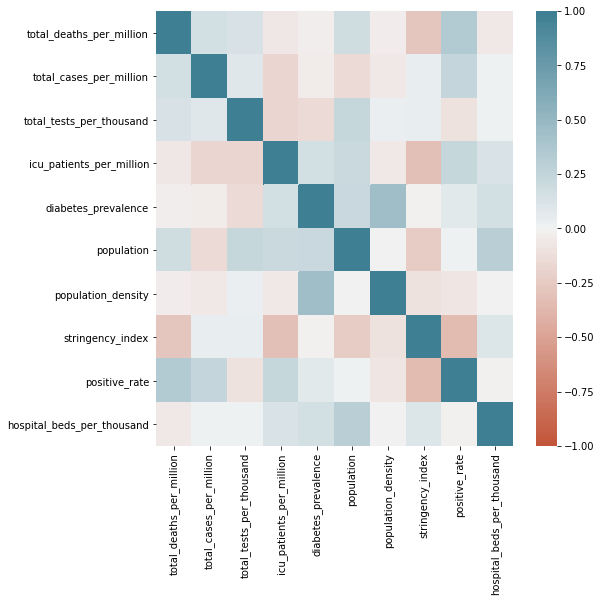

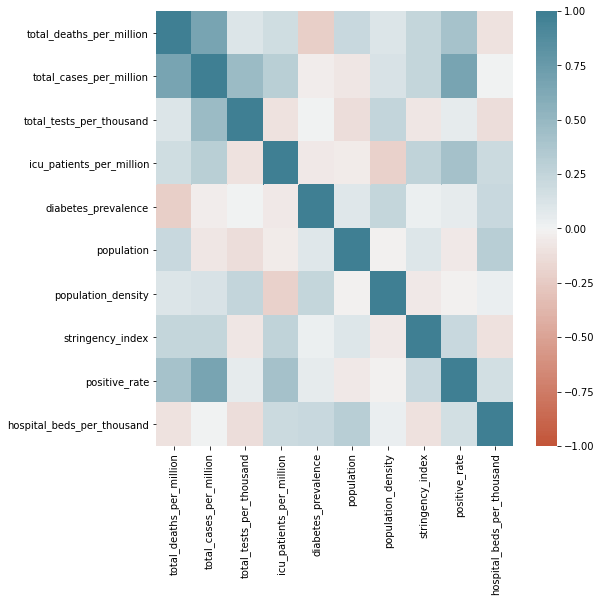

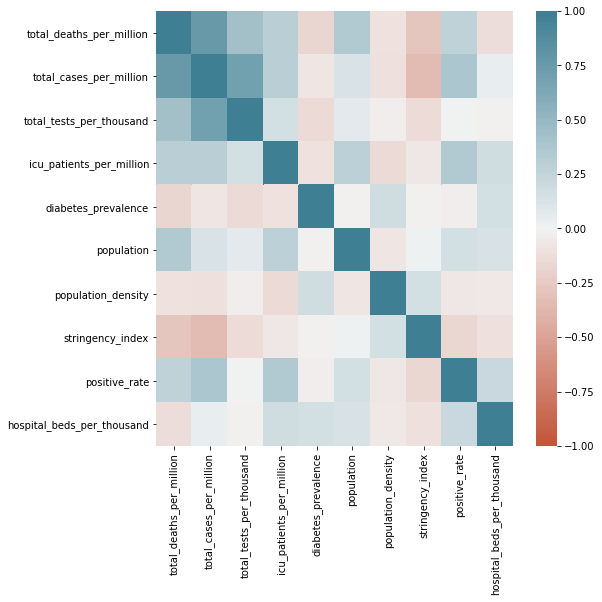

In [7]:
#!pip install country_converter

import country_converter as coco
countries = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
standard_names = coco.convert(names=countries, to='iso3')
#print(standard_names)

#diff = ['total_deaths_per_million', 'total_cases_per_million', 'total_tests_per_thousand', 'icu_patients_per_million', 'diabetes_prevalence', 'population', 'population_density', 'stringency_index', 'positive_rate', 'hospital_beds_per_thousand']

corr1 = df[df.iso_code.isin(standard_names)].fillna(method = 'ffill').fillna(method = 'bfill')\
    [df.stringency_index < 40][diff].corr()
corr2 = df[df.iso_code.isin(standard_names)].fillna(method = 'ffill').fillna(method = 'bfill')\
    [(df.stringency_index < 70) & (df.stringency_index > 40)][diff].corr()
corr3 = df[df.iso_code.isin(standard_names)].fillna(method = 'ffill').fillna(method = 'bfill')\
    [df.stringency_index > 70][diff].corr()

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)

sns.heatmap(
    corr1, 
    ax=ax, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)

sns.heatmap(
    corr2, 
    ax=ax, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)

sns.heatmap(
    corr3, 
    ax=ax, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'reproduction_rate')

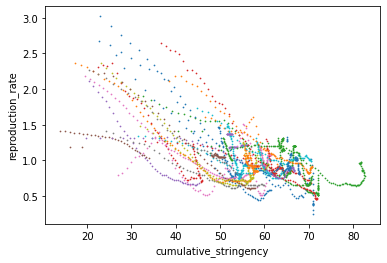

In [15]:
over70 = mega[mega.iso_code.isin(standard_names)].fillna(method = 'ffill').fillna(method = 'bfill')\
    [df.stringency_index > 70]

for name, group in over70.groupby('iso_code'):
    plt.scatter(group.avg_stringency, group['reproduction_rate'], s=0.5)

plt.xlabel('cumulative_stringency')
plt.ylabel('reproduction_rate')

64
70
57


,total_tests_per_thousand,new_deaths_smoothed_per_million,positive_rate,gdp_per_capita,reproduction_rate,population_density,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index,cumulative_stringency,avg_stringency
total_tests_per_thousand,1.000000,-0.036472,-0.377853,-0.149107,0.162702,-0.079387,-0.106752,0.060566,-0.025119,-0.032597,-0.206065,-0.055832,-0.087391,-0.128538,0.121761,0.154634,0.103032
new_deaths_smoothed_per_million,-0.036472,1.000000,0.301137,0.376256,-0.017669,0.068221,0.349269,-0.276363,-0.015394,0.398219,-0.054038,0.178847,0.362965,0.386783,-0.015533,-0.111908,-0.122494
positive_rate,-0.377853,0.301137,1.000000,0.270979,-0.067847,-0.010099,0.254511,-0.048350,0.077909,0.243795,0.216825,0.151590,0.193309,0.270047,-0.310071,-0.351189,-0.338930
gdp_per_capita,-0.149107,0.376256,0.270979,1.000000,-0.048608,0.107919,0.630081,-0.428202,0.357783,0.082812,-0.054417,0.150577,0.644380,0.687479,-0.237169,-0.248822,-0.245359
reproduction_rate,0.162702,-0.017669,-0.067847,-0.048608,1.000000,0.178349,-0.111159,-0.055404,0.037084,-0.095816,-0.199167,0.044486,-0.111866,-0.198780,-0.076221,-0.072026,0.012736
population_density,-0.079387,0.068221,-0.010099,0.107919,0.178349,1.000000,0.235095,-0.235268,0.312134,-0.124786,0.097732,0.212364,0.247543,0.164204,-0.263495,-0.283446,-0.278875
median_age,-0.106752,0.349269,0.254511,0.630081,-0.111159,0.235095,1.000000,-0.336159,0.342407,0.158629,0.147160,0.475361,0.870668,0.852264,-0.178202,-0.204293,-0.242286
cardiovasc_death_rate,0.060566,-0.276363,-0.048350,-0.428202,-0.055404,-0.235268,-0.336159,1.000000,0.050487,-0.102077,0.347163,0.028029,-0.403177,-0.323249,0.097531,0.157291,0.153143
diabetes_prevalence,-0.025119,-0.015394,0.077909,0.357783,0.037084,0.312134,0.342407,0.050487,1.000000,-0.146210,0.177083,0.058108,0.410620,0.418546,-0.103981,-0.062783,-0.035117
female_smokers,-0.032597,0.398219,0.243795,0.082812,-0.095816,-0.124786,0.158629,-0.102077,-0.146210,1.000000,0.300961,0.171895,0.061244,0.134107,0.239490,0.175823,0.107873


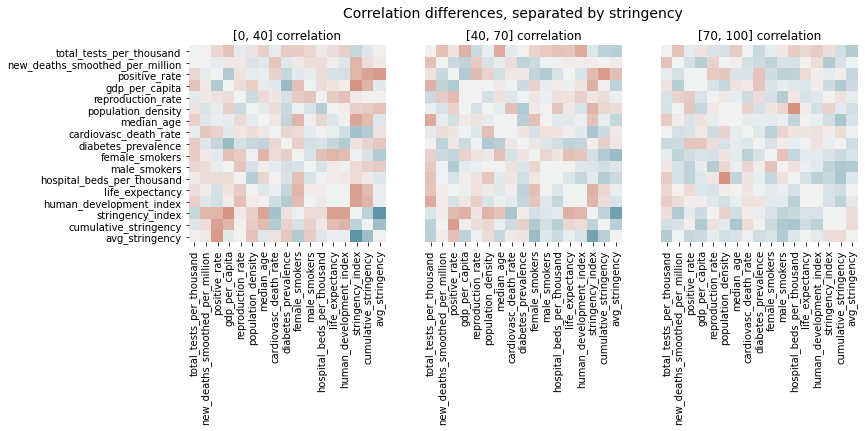

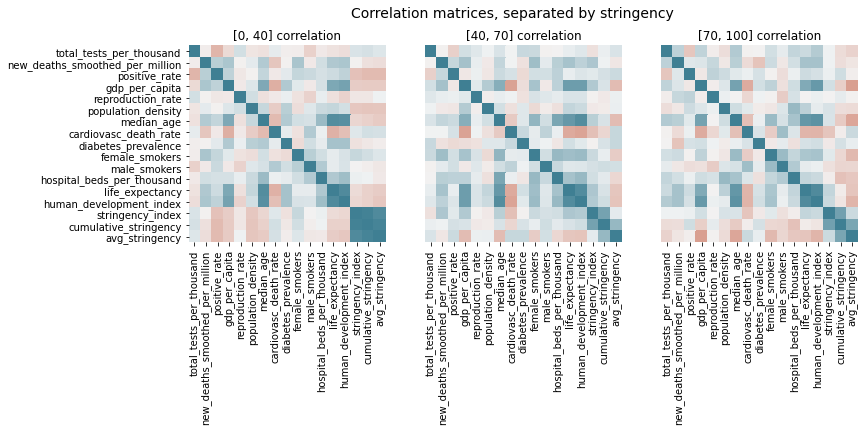

In [23]:
features = ['total_tests_per_thousand', 'new_deaths_smoothed_per_million', 'tests_units', 'positive_rate', 
            'gdp_per_capita', 'reproduction_rate', 'population_density', 'median_age',
            'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
            'male_smokers', 'hospital_beds_per_thousand','life_expectancy',
            'human_development_index', 'stringency_index', 'cumulative_stringency', 'avg_stringency']

idx = mega.groupby("iso_code")['new_deaths_smoothed_per_million'].transform(max) == mega['new_deaths_smoothed_per_million']

df = mega
df = df[df['iso_code'].notna()]

sampled = df[idx].drop_duplicates(subset=['iso_code'])[features]
iso = df[idx].drop_duplicates(subset=['iso_code'])['iso_code']

set1 = sampled[sampled.cumulative_stringency < 40]
set2 = sampled[(sampled.cumulative_stringency < 70) & (sampled.cumulative_stringency > 40)]
set3 = sampled[sampled.cumulative_stringency > 70]

print (len(set1))
print (len(set2))
print (len(set3))

corr1 = set1.corr()
corr2 = set2.corr()
corr3 = set3.corr()

a4_dims = (12, 4)
fig, ax = plt.subplots(figsize=a4_dims, ncols=3)
fig.suptitle("Correlation differences, separated by stringency", fontsize=14)

sns.heatmap(
    corr1-corr2, 
    ax=ax[0], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)
sns.heatmap(
    corr1-corr3, 
    ax=ax[1], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)
sns.heatmap(
    corr2-corr3, 
    ax=ax[2], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)


titles = ['[0, 40] correlation', '[40, 70] correlation', '[70, 100] correlation']
for i in range(len(ax)):
    a = ax[i]
    labels = ["" for x in a.get_yticklabels()]

    if i != 0:
        a.set_yticklabels(labels)
        a.set_yticks([])

    a.title.set_text(titles[i])

a4_dims = (12, 4)
fig, ax = plt.subplots(figsize=a4_dims, ncols=3)
fig.suptitle("Correlation matrices, separated by stringency", fontsize=14)

sns.heatmap(
    corr1, 
    ax=ax[0], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)
sns.heatmap(
    corr2, 
    ax=ax[1], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)
sns.heatmap(
    corr3, 
    ax=ax[2], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=False
)


titles = ['[0, 40] correlation', '[40, 70] correlation', '[70, 100] correlation']
for i in range(len(ax)):
    a = ax[i]
    labels = ["" for x in a.get_yticklabels()]

    if i != 0:
        a.set_yticklabels(labels)
        a.set_yticks([])

    a.title.set_text(titles[i])

corr1